<a href="https://colab.research.google.com/github/buimanhtien33/numoptwithpython/blob/main/Gradient_Descent/Gradient_Descent_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chọn x = 10, learning_rate = 0.1, 

giá trị $f(x) = x^2 -2x +1$


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
x = sp.Symbol('x')

In [ ]:
def gradient_descent(cost_fn, initial_guess, step_size):
  df = sp.diff(cost_fn, x)
  df = sp.lambdify(x,df)

  precision = 0.0001

  new_x = initial_guess
  x_array = np.array([new_x])

  for n in range(100):
    # Step 1: Predict (Make a guess)
    previous_x = new_x

    # Step 2: Calculate the error
    gradient = df(previous_x)

    # Step 3: Learn
    new_x = previous_x - step_size * gradient

    # Step 4: Check convergence condition
    step_length = abs(new_x - previous_x)

    x_array = np.append(x_array, new_x)

    if step_length < precision:
      break

  print('Minimum occurs at x-value: ', new_x)
  print('Slope at the minimun is: ',df(new_x))
  print('Current iter: ',n)
  print('Current step length:  ',step_length)
  return new_x, step_length, x_array


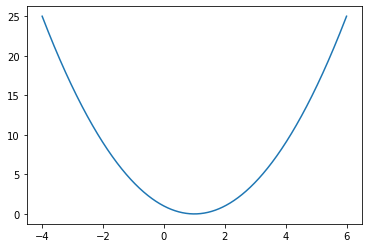

In [ ]:
fx = x**2 -2*x +1

# Plot function fx
tx = np.linspace(-4,6,1000)
ftx = tx**2 -2*tx +1
plt.plot(tx,ftx)
#plt.xlim(-4,6)
plt.show()



In [ ]:
dfx = sp.diff(fx, x)
dfx

2*x - 2

In [ ]:
x_opt, last_step_length, x_array = gradient_descent(fx, 10, 0.1)

Minimum occurs at x-value:  1.000392005286693
Slope at the minimun is:  0.0007840105733860625
Current iter:  44
Current step length:   9.800132167314679e-05


In [ ]:
f_array = np.array([fx.subs(x, x_array[k]) for k in range(x_array.size)])

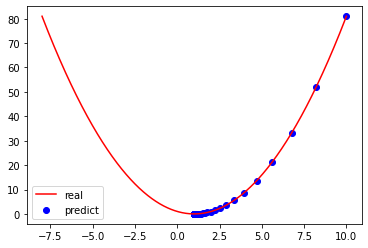

In [ ]:
tx = np.linspace(-8,10,1000)
ftx = tx**2 -2*tx +1
plt.plot(tx,ftx, label = 'real', color='red')
plt.scatter(x_array,f_array, label ='predict',color='blue')
plt.legend()
plt.show()